In [198]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


# 1.Data Preparation

In [199]:
# Load the dataset from a CSV file
data = pd.read_csv('heart_disease.csv')

In [200]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


# 2.Exploratory Data Analysis (EDA)

In [201]:
# Summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [202]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [203]:
# Check for missing values
print(data.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


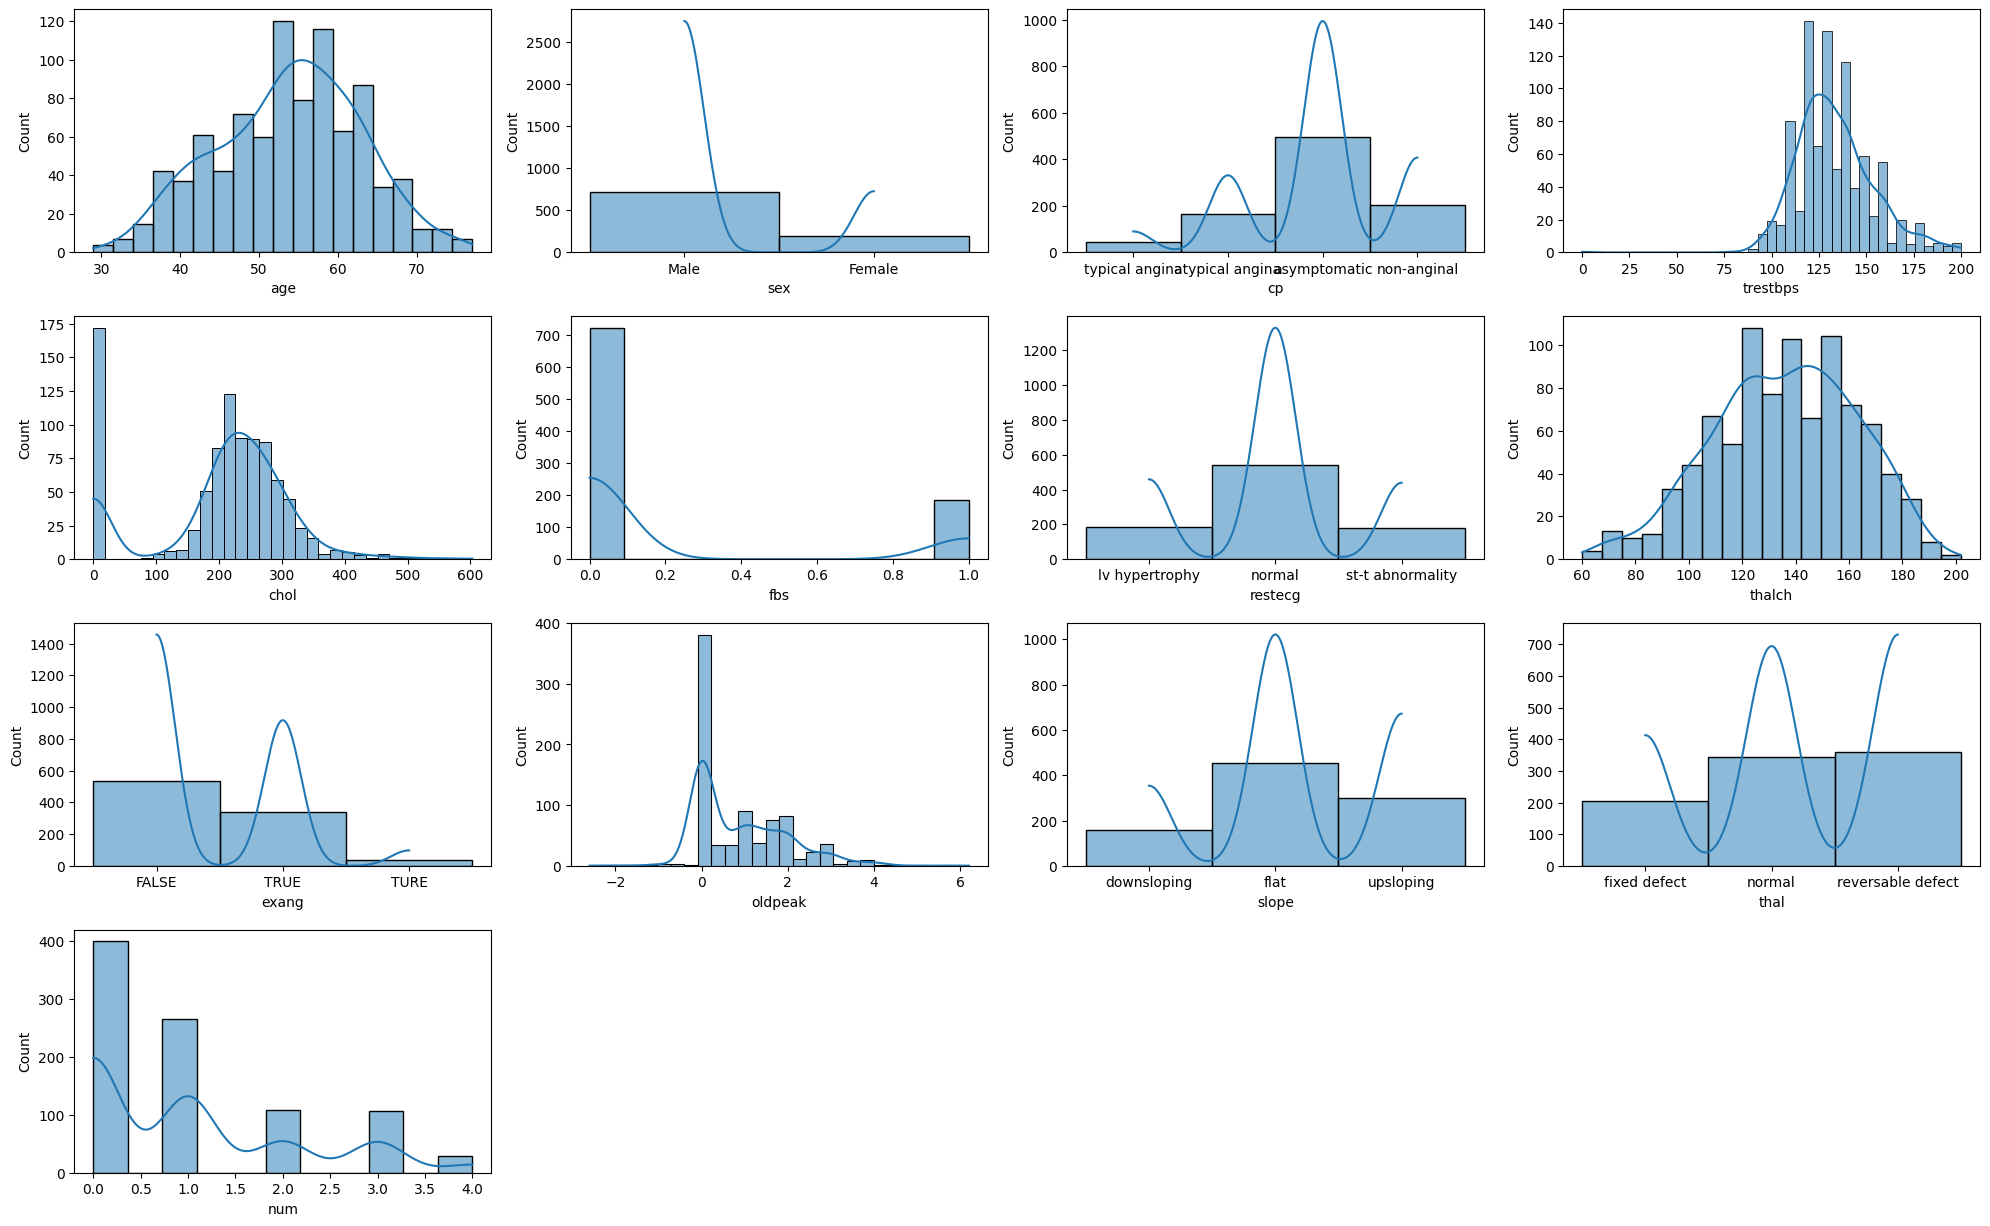

In [204]:
# Visualize the distribution of features
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(data[column], kde=True)
plt.tight_layout()
plt.show()

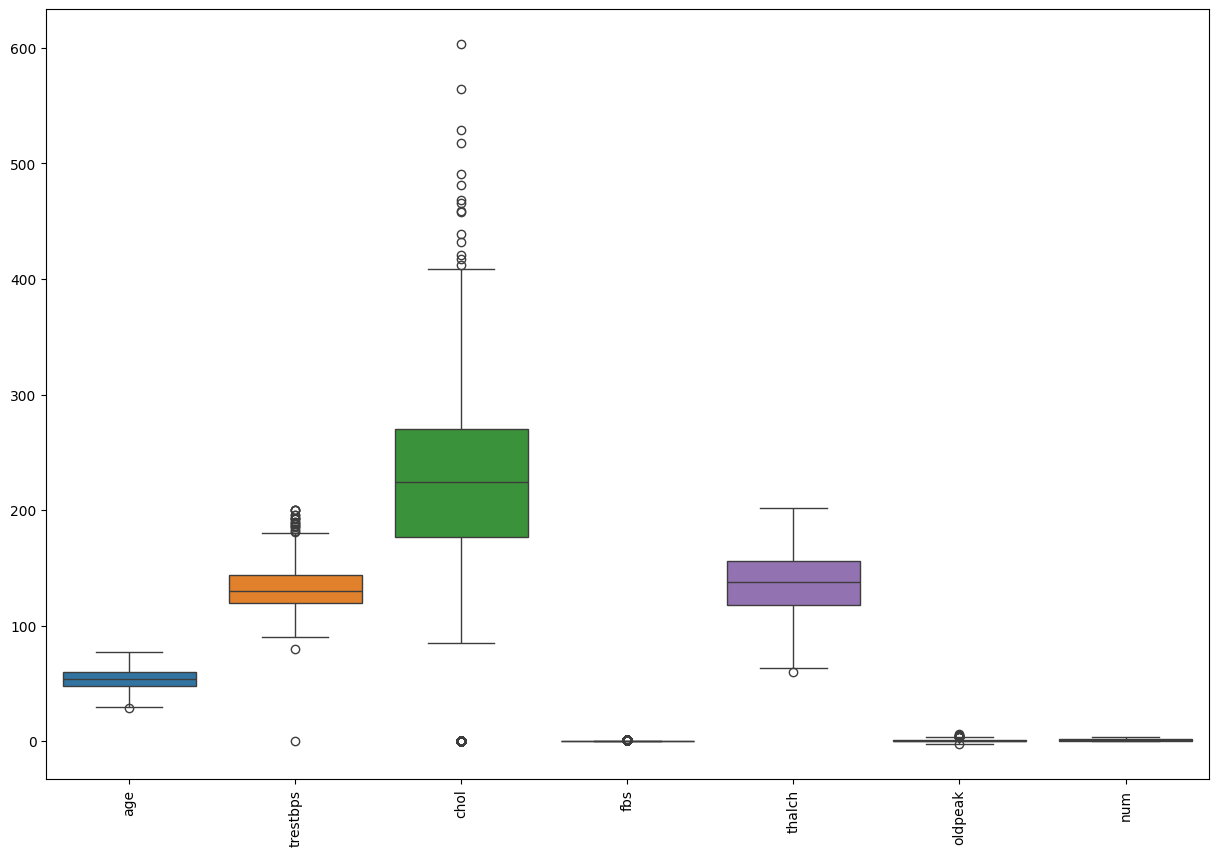

In [205]:
# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

# 3.Feature Engineering

In [206]:
# Encoding categorical variables
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

In [207]:
# Handle missing values if needed (example: fill with mean)
data = data.fillna(data.mean())

In [208]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,0,2.300000,0,0,0
1,41,1,1,135,203,False,1,132,0,0.000000,1,0,0
2,57,1,0,140,192,False,1,148,0,0.400000,1,0,0
3,52,1,3,118,186,False,0,190,0,0.000000,1,0,0
4,57,1,0,110,201,False,1,126,1,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,1,120,0,1.500000,2,1,4
904,62,1,0,166,170,False,2,120,1,3.000000,1,0,4
905,56,1,2,170,0,False,0,123,1,2.500000,0,0,4
906,56,1,2,144,208,True,2,105,2,0.891253,0,2,4


# 4.Decision Tree Classification

In [209]:
# Split the dataset into features and target variable
X = data.drop('age', axis=1)  # Replace 'target_column' with the actual target column name
y = data['age']


In [210]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [211]:
# Implement Decision Tree Classification
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

In [212]:
y_pred

array([57, 63, 54, 65, 67, 62, 53, 56, 60, 59, 55, 61, 53, 51, 60, 58, 50,
       58, 60, 58, 47, 54, 51, 65, 54, 64, 49, 58, 59, 46, 63, 51, 53, 63,
       46, 47, 54, 54, 38, 44, 46, 41, 57, 64, 64, 62, 58, 49, 67, 52, 56,
       47, 45, 50, 55, 68, 59, 40, 59, 57, 64, 35, 63, 60, 50, 67, 57, 55,
       57, 49, 67, 63, 38, 63, 62, 47, 75, 41, 62, 56, 59, 54, 55, 56, 48,
       54, 66, 64, 39, 65, 41, 61, 53, 39, 56, 54, 69, 42, 58, 53, 42, 65,
       60, 40, 55, 73, 43, 55, 52, 60, 54, 49, 46, 52, 50, 62, 56, 54, 56,
       50, 58, 37, 55, 62, 58, 53, 56, 60, 62, 64, 38, 55, 73, 54, 60, 69,
       50, 54, 61, 60, 53, 41, 39, 60, 59, 39, 59, 54, 62, 51, 54, 64, 51,
       51, 39, 53, 55, 39, 49, 49, 58, 71, 55, 51, 51, 58, 61, 52, 46, 46,
       58, 51, 42, 49, 37, 69, 52, 58, 58, 63, 54, 71])

In [213]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.04945054945054945
Precision: 0.04394899971823049
Recall: 0.04945054945054945
F1 Score: 0.04538738572352017


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [214]:
"""
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC: {roc_auc}')
"""

"\nroc_auc = roc_auc_score(y_test, y_pred)\nprint(f'ROC-AUC: {roc_auc}')\n"

# 5.Hyperparameter Tuning:

In [215]:
# Define the hyperparameters and their values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)

# Evaluate the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')


print(f'Best Accuracy: {accuracy_best}')
print(f'Best Precision: {precision_best}')
print(f'Best Recall: {recall_best}')
print(f'Best F1 Score: {f1_best}')



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Accuracy: 0.038461538461538464
Best Precision: 0.09481946624803769
Best Recall: 0.038461538461538464
Best F1 Score: 0.04292685336641381


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 6.Model Evaluation and Analysis

In [216]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)


X_train (726, 12)
X_test (182, 12)
y_train (726,)
y_test (182,)


In [217]:
X_train.head()

,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
84,1,1,120,295,False,1,162,0,0.000000,2,1,0
10,0,3,170,237,False,2,170,0,0.000000,0,0,0
617,1,2,140,237,True,1,94,0,0.000000,2,2,1
250,1,0,104,0,False,2,111,0,0.000000,1,2,0
869,1,2,137,142,False,1,68,0,0.891253,1,0,3


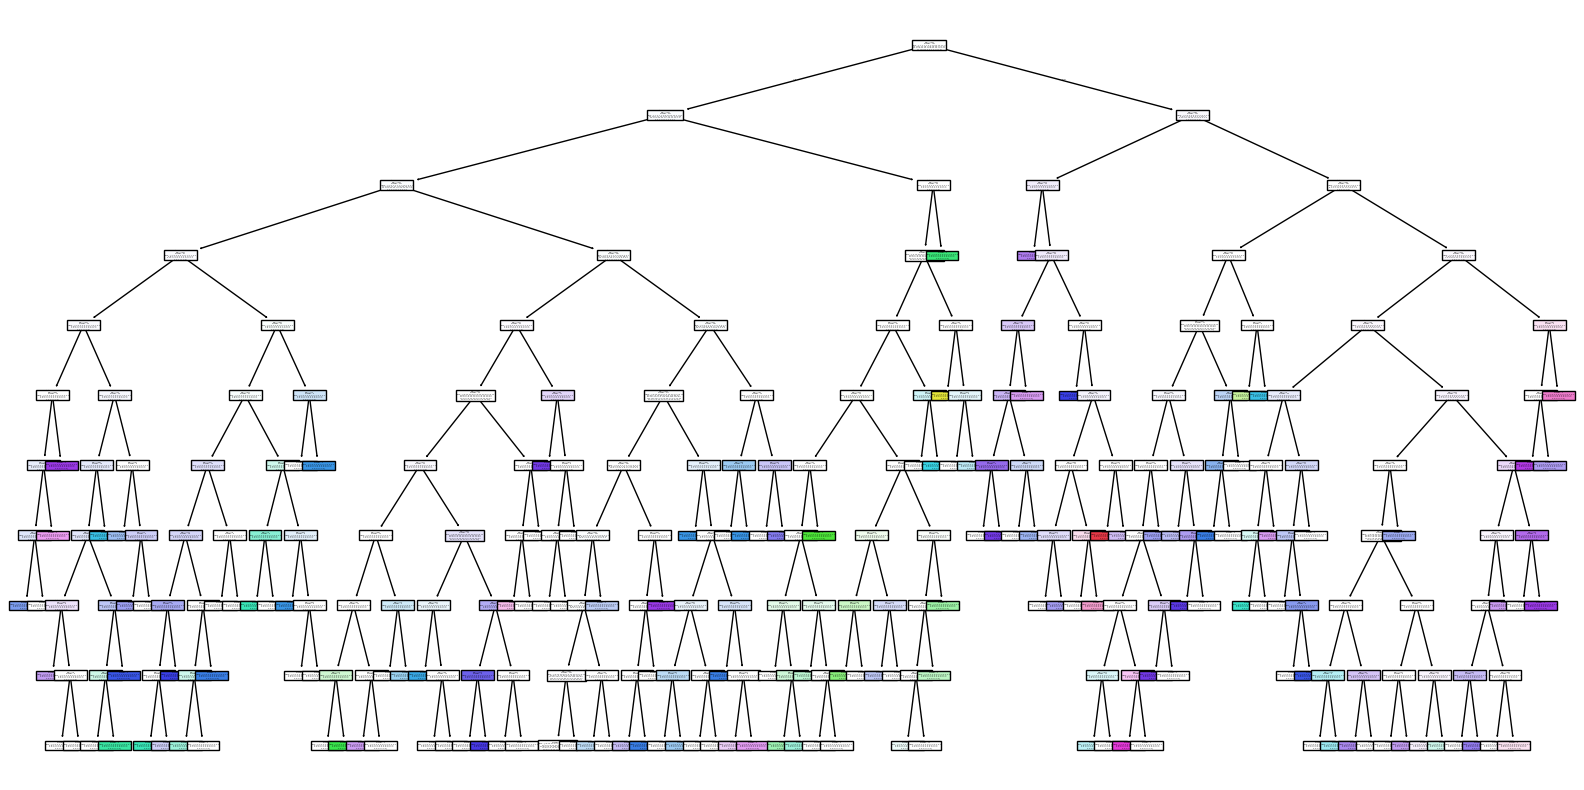

In [218]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 10))
# Remove class_names argument or set it to None for regression problems
plot_tree(best_clf, feature_names=X.columns, filled=True)
plt.show()

# Interview Questions:



1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Max Depth: Controls the maximum depth of the tree. Limits complexity to prevent overfitting.

Min Samples Split: Minimum number of samples required to split a node. Higher values reduce overfitting.

Min Samples Leaf: Minimum number of samples required at a leaf node. Prevents overfitting by ensuring leaf nodes have enough samples.

Max Features: Number of features to consider when looking for the best split. Reduces overfitting by limiting the features.

Criterion: Function to measure the quality of a split ("gini" or "entropy"). Determines how splits are made


2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding: Converts categories into numeric labels. Suitable for ordinal data but can introduce false order for nominal data.

One-Hot Encoding: Converts categories into binary vectors. Suitable for nominal data, creates separate columns for each category.